In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_movies_detailed_up_to_2025.csv to netflix_movies_detailed_up_to_2025 (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471
5,11324,Movie,Shutter Island,Martin Scorsese,"Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley,...",United States of America,2010-02-14,2010,8.200,NaN,"Drama, Thriller, Mystery",en,World War II soldier-turned-U.S. Marshal Teddy...,101.551,24282,8.200,80000000,294804195
6,38575,Movie,The Karate Kid,Harald Zwart,"Jaden Smith, Jackie Chan, Taraji P. Henson, We...","China, Hong Kong, United States of America",2010-06-10,2010,6.500,NaN,"Action, Adventure, Drama, Family",en,Twelve-year-old Dre Parker could have been the...,96.385,6082,6.500,40000000,359126022
7,10138,Movie,Iron Man 2,Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...",United States of America,2010-04-28,2010,6.800,NaN,"Adventure, Action, Science Fiction",en,With the world now aware of his dual life as t...,95.255,21222,6.800,200000000,623933331
8,38365,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States of America,2010-06-24,2010,6.394,NaN,Comedy,en,After their high school basketball coach passe...,93.281,6212,6.394,80000000,271430189
9,48650,Movie,Room in Rome,Julio Medem,"Elena Anaya, Natasha Yarovenko, Enrico Lo Vers...","France, Spain",2010-05-07,2010,6.416,NaN,"Drama, Romance",es,A hotel room in the center of Rome serves as t...,90.230,748,6.416,0,844281


In [ ]:
df_selected = df[['type', 'release_year', 'genres', 'rating']]

In [ ]:
# -- Memprediksi rating berdasarkan fitur numerik & genre --
df_encoded = df_selected.dropna(subset=['rating'])

y = df_encoded['rating']
X = df_encoded.drop(columns=['rating'])

X_encoded = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# -- Model Random Forest untuk Prediksi rating
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Evaluasi Model Random Forest:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Evaluasi Model Random Forest:
Mean Squared Error (MSE): 4.122
Root Mean Squared Error (RMSE): 2.030
R-squared (R²): -0.326


/tmp/ipython-input-34-2199769746.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


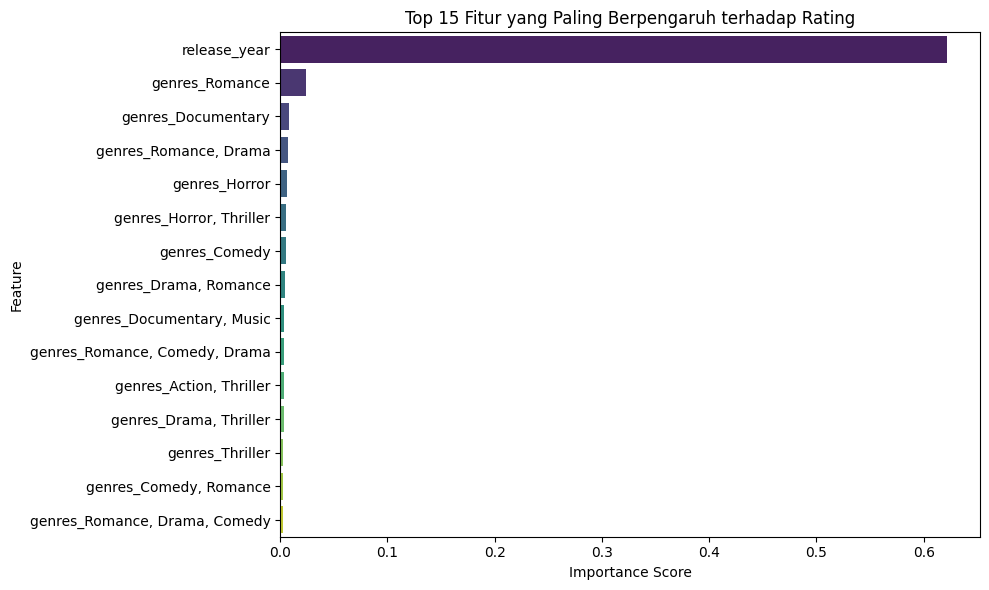

,Feature,Importance
0,release_year,0.621355
1942,genres_Romance,0.024480
1160,genres_Documentary,0.008498
1977,"genres_Romance, Drama",0.007112
1696,genres_Horror,0.006585
1803,"genres_Horror, Thriller",0.005131
859,genres_Comedy,0.005120
1366,"genres_Drama, Romance",0.004377
1187,"genres_Documentary, Music",0.003816
1961,"genres_Romance, Comedy, Drama",0.003630


from matplotlib import pyplot as plt
_df_2['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# -- Feature Importance --
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = X_encoded.columns[selector.get_support()]

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': selected_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(15),
    palette='viridis'
)
plt.title('Top 15 Fitur yang Paling Berpengaruh terhadap Rating')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

feature_importance_df.head(10)



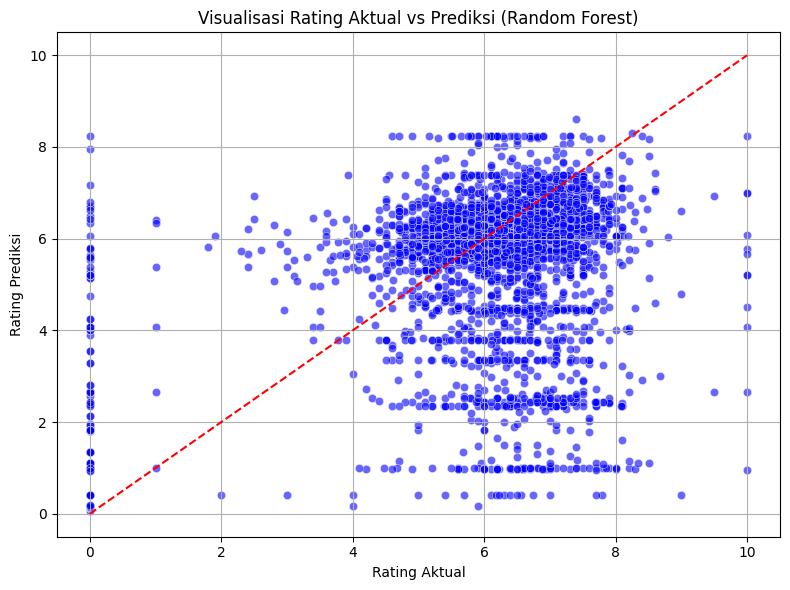

In [ ]:
# -- Visualisasi Prediksi vs Aktual --
import matplotlib.pyplot as plt
import seaborn as sns

# Plot prediksi vs aktual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Garis ideal
plt.xlabel('Rating Aktual')
plt.ylabel('Rating Prediksi')
plt.title('Visualisasi Rating Aktual vs Prediksi (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

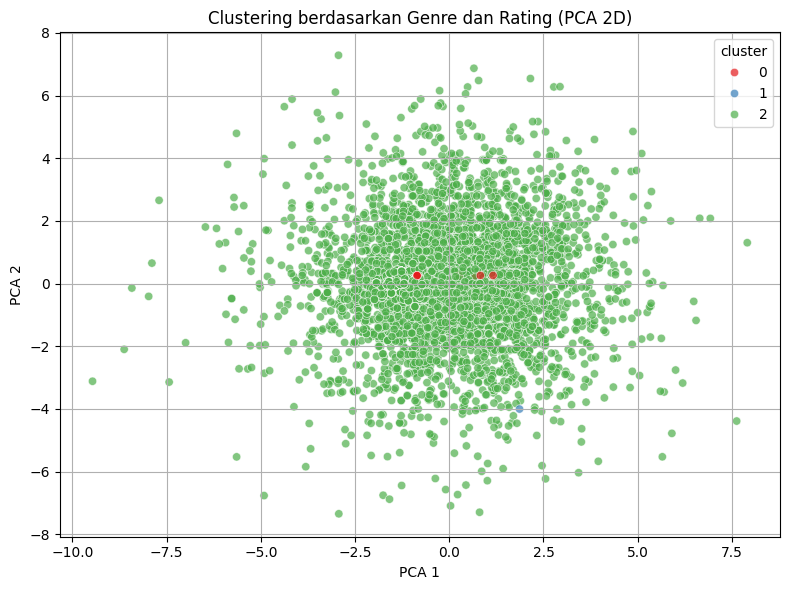

In [ ]:
# -- Clustering Berdasarkan Genre dan Rating --
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df_cluster = df_encoded.copy()
df_cluster = pd.get_dummies(df_cluster, columns=['genres'])

X_cluster = df_cluster.drop(columns=['type', 'release_year'])

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_cluster_scaled)

pca = PCA(n_components=2)
components = pca.fit_transform(X_cluster_scaled)

df_cluster['pca_1'] = components[:, 0]
df_cluster['pca_2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='pca_1', y='pca_2', hue='cluster', palette='Set1', alpha=0.7)
plt.title('Clustering berdasarkan Genre dan Rating (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()